In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from ipywidgets import widgets, interactive
sns.color_palette("Spectral", as_cmap=True);

In [ ]:
df1 = pd.read_csv("API_SH.STA.SUIC.P5_DS2_en_csv_v2_4523805.csv", 
                  header=2,
                  skip_blank_lines=True
                  )
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,8.749414,8.565869,8.479565,8.324659,8.244062,8.128884,8.036293,NaN,NaN,NaN
2,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.200686,5.998003,5.768566,5.672701,5.558145,5.429821,5.409499,NaN,NaN,NaN
4,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000,NaN,NaN,NaN


In [ ]:
df2 = pd.read_csv("Metadata_Country_API_SH.STA.SUIC.P5_DS2_en_csv_v2_4523805.csv", 
                  skip_blank_lines=True
                  )\
        .dropna(axis=1, thresh=10)
df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [ ]:
df = pd.merge(
    df1,
    df2,
    how="left",
    on=["Country Code"]
)

In [ ]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'],
      dtype='object')

In [ ]:
years_to_be_studied = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
                       '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                       '2014', '2015', '2016', '2017', '2018', '2019']

In [ ]:
df = df.loc[:, ["Country Name", "Country Code", "IncomeGroup", "Region", 
            '2000', '2001', '2002', '2003', '2004', '2005', '2006', 
            '2007', '2008', '2009', '2010', '2011', '2012', '2013',
            '2014', '2015', '2016', '2017', '2018', '2019', '2020']]\
       .dropna(axis=0, thresh=23)

df.head()

,Country Name,Country Code,IncomeGroup,Region,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,Low income,South Asia,4.9,5.0,5.0,5.0,5.0,5.0,...,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1,NaN
4,Angola,AGO,Lower middle income,Sub-Saharan Africa,8.7,8.6,8.6,8.8,8.6,8.1,...,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1,NaN
5,Albania,ALB,Upper middle income,Europe & Central Asia,4.9,4.5,4.6,4.8,4.8,7.5,...,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3,NaN
8,United Arab Emirates,ARE,High income,Middle East & North Africa,8.6,8.6,8.0,7.5,7.7,7.9,...,8.2,7.9,7.5,7.0,6.5,6.0,5.6,6.0,6.4,NaN
9,Argentina,ARG,Upper middle income,Latin America & Caribbean,9.1,10.3,10.2,9.7,8.7,8.6,...,8.5,9.1,8.6,9.3,8.3,8.3,8.9,9.2,8.4,NaN


In [ ]:
sns.set(style="darkgrid")

In [ ]:
option_list = list(df['Country Name'].unique())

country1 = widgets.Dropdown(
                            options = option_list,
                            description='Country1'
                          )

country2 = widgets.Dropdown(
                            options = option_list,
                            description='Country2'
                          )

country3 = widgets.Dropdown(
                            options = option_list,
                            description='Country3'
                          )

In [ ]:
def plot_by_country(country1, country2, country3):
  df_country = df.loc[df['Country Name'].isin([country1,country2,country3])]
  df_data = df_country.loc[:, years_to_be_studied].T
  df_data.columns = df_country.loc[:,"Country Name"].values
  plt.figure(figsize=(17,5))
  sns.lineplot(data = df_data)
  plt.ylabel("Number of suicides for every 100K population")
  plt.show()

In [ ]:
interactive(plot_by_country, country1 = country1, country2 = country2, country3 = country3)

interactive(children=(Dropdown(description='Country1', options=('Afghanistan', 'Angola', 'Albania', 'United Ar…

#Question: Does incomes of a country affect the rates of suicide?

#####After aggregating data on the basis of income group it can be clearly seen that suicides constitute a major percentage of deaths in conutries that lie in Higher Income Groups. There is a significant gap in case of High Income and others while the gap between Upper Middle and others are a bit less. Possible reasons:

1.   Highesr social security in high income countries
2.   Better trauma care and other critical care facilities in high income countries.
3.   Death by other means like accident and wars could be a reason in comparatively low income countries.



In [ ]:
df["IncomeGroup"].unique()

array(['Low income', 'Lower middle income', 'Upper middle income',
       'High income', nan], dtype=object)

In [ ]:
cols = years_to_be_studied
cols.append("IncomeGroup")
df3 = df[df.columns[df.columns.isin(cols)]]

In [ ]:
df3 = df3.groupby(["IncomeGroup"])\
         .median()\
         .T

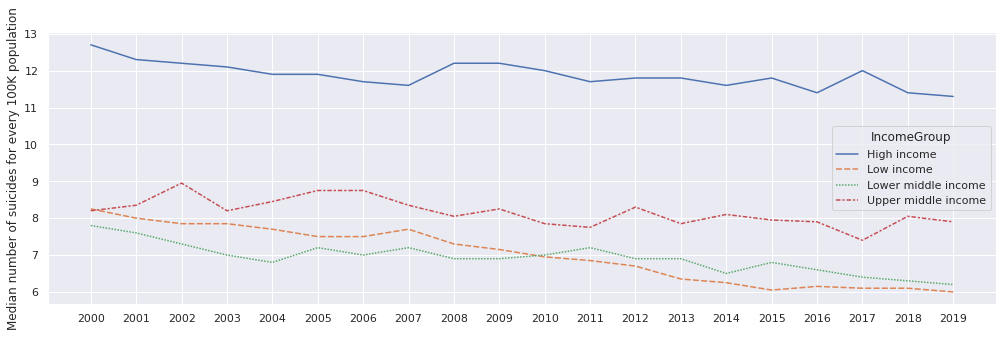

In [ ]:
plt.figure(figsize=(17,5))
sns.lineplot(data = df3)
plt.ylabel("Median number of suicides for every 100K population")
plt.show()

#Question: Which specific countries from High Income and Upper Middle Income category have higher suicide rates? What could be the reasons?(3)
#####Following countries were most frequenly appearing in bottom 5 of the list:


1.   Lithuania
2.   Korea



In [ ]:
cols = years_to_be_studied
cols.append("Country Name")

df_higher_income = df[df.IncomeGroup=="High income"]\
                    .loc[:,cols]

df_upper_middle_income = df[df.IncomeGroup=="Upper middle income"]\
                          .loc[:,cols]

print(df.shape)
print(df_higher_income.shape)
print(df_upper_middle_income.shape)

(183, 25)
(53, 21)
(48, 21)


In [ ]:
df_higher_income.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Country Name
8,8.6,8.6,8.0,7.5,7.7,7.9,8.3,8.3,8.5,8.5,...,8.2,7.9,7.5,7.0,6.5,6.0,5.6,6.0,6.4,United Arab Emirates
12,1.9,1.9,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,...,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4,Antigua and Barbuda
13,12.7,12.2,11.3,10.5,10.3,11.2,10.6,10.9,11.6,11.2,...,11.2,11.7,11.5,12.7,13.2,12.2,13.1,12.4,12.5,Australia
14,19.9,18.6,19.3,18.2,17.5,17.2,16.4,16.0,15.8,16.0,...,16.5,16.3,16.2,16.5,16.0,15.5,15.4,15.7,14.6,Austria
17,22.0,22.3,20.9,21.5,20.2,20.7,20.2,18.7,20.3,20.6,...,21.1,20.8,19.5,19.4,18.6,19.3,18.9,18.7,18.3,Belgium


In [ ]:
highest_suicides_country_in_high_income = dict()
for year in years_to_be_studied:
  highest_suicides_country_in_high_income[year] = df_higher_income[[year,"Country Name"]].sort_values(year)[-5:]["Country Name"].values[::-1]
df5 = pd.DataFrame(highest_suicides_country_in_high_income)
df5.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,Lithuania,"Korea, Rep.","Korea, Rep."
1,Latvia,Latvia,Latvia,Slovenia,Slovenia,Slovenia,Slovenia,"Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.","Korea, Rep.",Lithuania,Lithuania
2,Hungary,Slovenia,Estonia,Latvia,Hungary,"Korea, Rep.",Hungary,Japan,Latvia,Latvia,Hungary,Hungary,Hungary,Slovenia,Latvia,Latvia,Latvia,Latvia,Uruguay,Uruguay
3,Slovenia,Estonia,Slovenia,Hungary,Latvia,Latvia,Japan,Hungary,Hungary,Hungary,Japan,Japan,Latvia,Hungary,Hungary,Slovenia,Uruguay,Slovenia,Belgium,Latvia
4,Estonia,Hungary,Hungary,Estonia,Estonia,Hungary,"Korea, Rep.",Slovenia,Japan,Japan,Latvia,Latvia,Slovenia,Japan,Japan,Hungary,Belgium,Uruguay,Latvia,Slovenia


**It can be seen from abave plot that Lithuania stood on top of the list for a long time until 2017 when it started improving and then staying at second position till 2019.**

In [ ]:
df5.T

,0,1,2,3,4
2000,Lithuania,Latvia,Hungary,Slovenia,Estonia
2001,Lithuania,Latvia,Slovenia,Estonia,Hungary
2002,Lithuania,Latvia,Estonia,Slovenia,Hungary
2003,Lithuania,Slovenia,Latvia,Hungary,Estonia
2004,Lithuania,Slovenia,Hungary,Latvia,Estonia
2005,Lithuania,Slovenia,"Korea, Rep.",Latvia,Hungary
2006,Lithuania,Slovenia,Hungary,Japan,"Korea, Rep."
2007,Lithuania,"Korea, Rep.",Japan,Hungary,Slovenia
2008,Lithuania,"Korea, Rep.",Latvia,Hungary,Japan
2009,Lithuania,"Korea, Rep.",Latvia,Hungary,Japan


Text(0.5, 1.0, 'Distribution for final position')

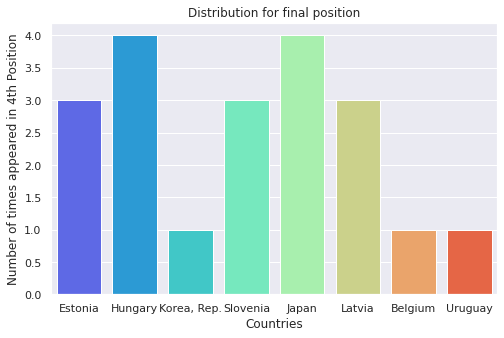

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=4,data=df5.T, palette='rainbow')
plt.ylabel("Number of times appeared in 4th Position")
plt.xlabel("Countries")
plt.title("Distribution for final position")

Text(0.5, 1.0, 'Distribution for second last position')

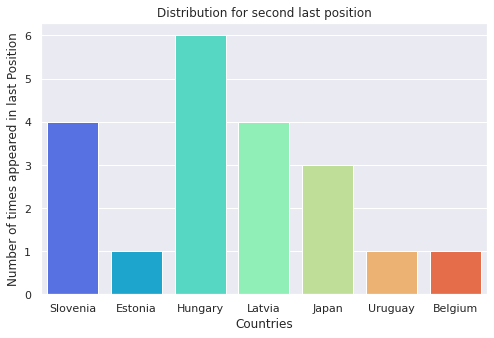

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=3,data=df5.T, palette='rainbow')
plt.ylabel("Number of times appeared in last Position")
plt.xlabel("Countries")
plt.title("Distribution for second last position")

Text(0.5, 1.0, 'Distribution for third last position')

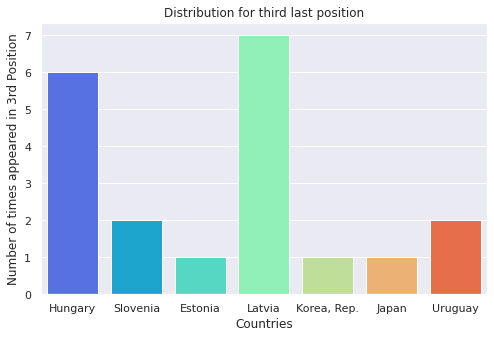

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=2,data=df5.T, palette='rainbow')
plt.ylabel("Number of times appeared in 3rd Position")
plt.xlabel("Countries")
plt.title("Distribution for third last position")

Text(0.5, 1.0, 'Distribution for second position')

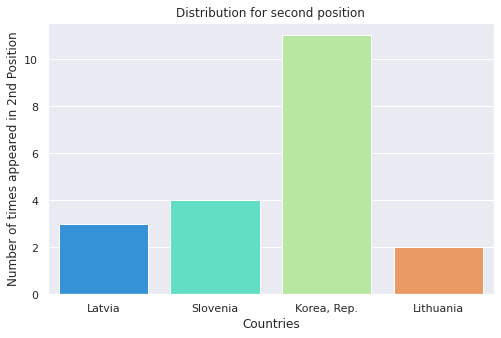

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=1,data=df5.T, palette='rainbow')
plt.ylabel("Number of times appeared in 2nd Position")
plt.xlabel("Countries")
plt.title("Distribution for second position")

Text(0.5, 1.0, 'Distribution for first position')

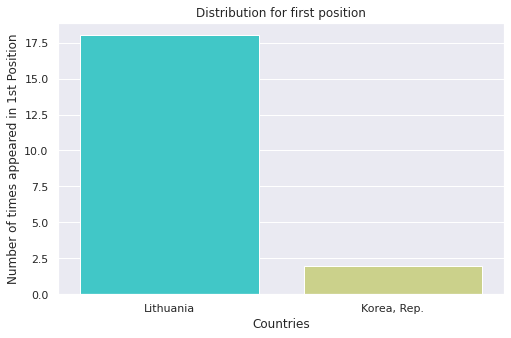

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=0,data=df5.T, palette='rainbow')
plt.ylabel("Number of times appeared in 1st Position")
plt.xlabel("Countries")
plt.title("Distribution for first position")

**From all the above plots it can be concluded that Esawtini and Lesotho are the countries with most frequently appearing in the bottom 5 list.**

In [ ]:
df4 = df_higher_income.T
df4.columns = df4.loc["Country Name"]
df4.drop(["Country Name"], inplace = True)
df4.head()

Country Name,United Arab Emirates,Antigua and Barbuda,Australia,Austria,Belgium,Bahrain,"Bahamas, The",Barbados,Brunei Darussalam,Canada,...,Romania,Saudi Arabia,Singapore,Slovak Republic,Slovenia,Sweden,Seychelles,Trinidad and Tobago,Uruguay,United States
2000,8.6,1.9,12.7,19.9,22.0,6.6,2.3,2.6,1.9,11.9,...,12.9,3.2,12.4,14.2,32.0,15.1,9.2,16.3,16.0,11.0
2001,8.6,1.9,12.2,18.6,22.3,8.8,2.5,1.6,1.3,12.2,...,12.3,3.3,11.3,13.9,30.9,16.0,9.2,16.3,14.5,11.4
2002,8.0,1.3,11.3,19.3,20.9,9.2,2.3,0.3,1.6,11.9,...,14.2,3.4,12.4,14.6,29.1,15.5,8.6,15.3,19.8,11.8
2003,7.5,1.3,10.5,18.2,21.5,10.2,2.4,1.2,1.6,12.4,...,13.5,3.5,12.1,15.0,29.7,14.4,9.0,13.4,15.6,11.7
2004,7.7,1.7,10.3,17.5,20.2,10.2,3.2,1.4,1.9,11.7,...,12.7,3.4,11.7,13.9,28.7,14.8,9.3,13.1,15.3,11.9


#Question: What is the region wise distribution of income?(1)

In [ ]:
region_wise_income = df[["Country Name", "IncomeGroup", "Region"]]
region_wise_income.head()

,Country Name,IncomeGroup,Region
2,Afghanistan,Low income,South Asia
4,Angola,Lower middle income,Sub-Saharan Africa
5,Albania,Upper middle income,Europe & Central Asia
8,United Arab Emirates,High income,Middle East & North Africa
9,Argentina,Upper middle income,Latin America & Caribbean


In [ ]:
region_wise_income_distribution = pd.DataFrame(region_wise_income.groupby(["IncomeGroup", "Region"])["Country Name"].count())
region_wise_income_distribution.columns = ["Count"]
region_wise_income_distribution

Count
IncomeGroup         Region                           
High income         East Asia & Pacific             6
                    Europe & Central Asia          29
                    Latin America & Caribbean       7
                    Middle East & North Africa      8
                    North America                   2
                    Sub-Saharan Africa              1
Low income          East Asia & Pacific             1
                    Middle East & North Africa      2
                    South Asia                      1
                    Sub-Saharan Africa             24
Lower middle income East Asia & Pacific            14
                    Europe & Central Asia           4
                    Latin America & Caribbean       5
                    Middle East & North Africa      7
                    South Asia                      6
                    Sub-Saharan Africa             17
Upper middle income East Asia & Pacific             5
                    Europe & Central Asia          15
                    Latin America & Caribbean      18
                    Middle East & North Africa      3
                    South Asia                      1
                    Sub-Saharan Africa              6

In [ ]:
def income_wise_distribution(income_category):
  data = region_wise_income_distribution.loc[income_category]
  plt.figure(figsize=(12,6))
  plt.title(f'{income_category} Region wise distribution')
  sns.barplot(data=data, x=data.Count, y=data.index, orient = 'h')
  plt.xlabel("Number of Countries")
  plt.show()

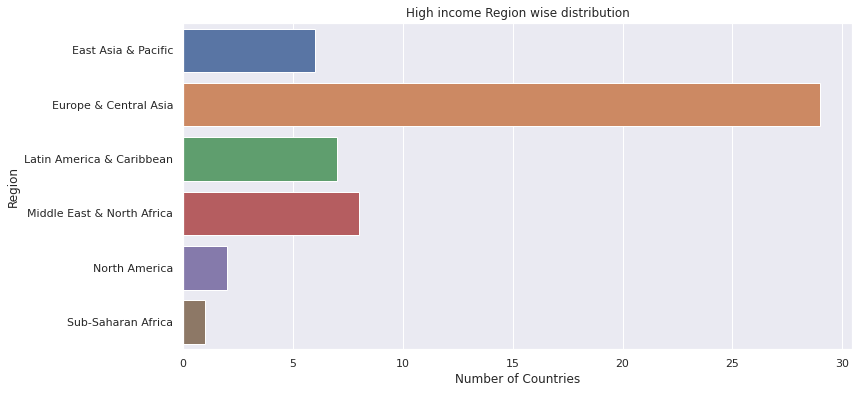

In [ ]:
income_wise_distribution("High income")

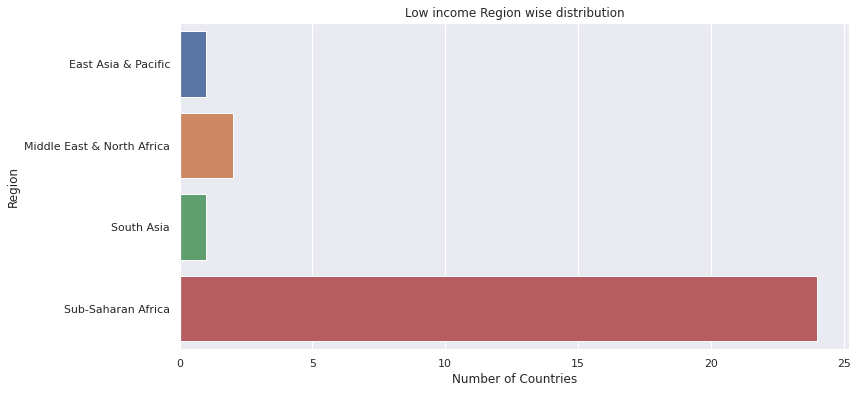

In [ ]:
income_wise_distribution("Low income")

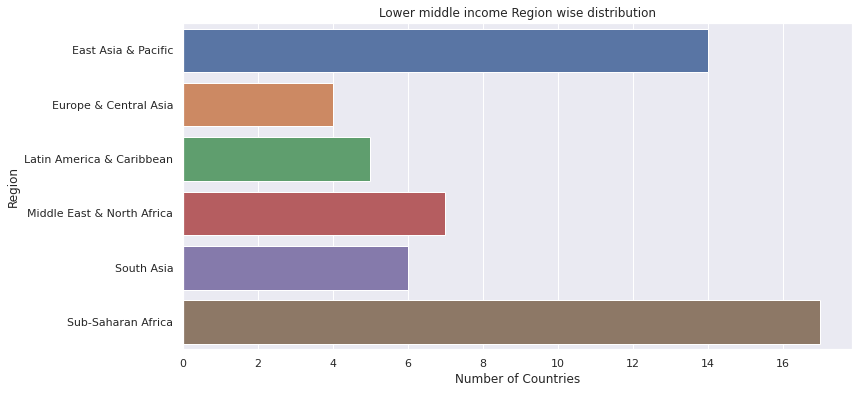

In [ ]:
income_wise_distribution("Lower middle income")

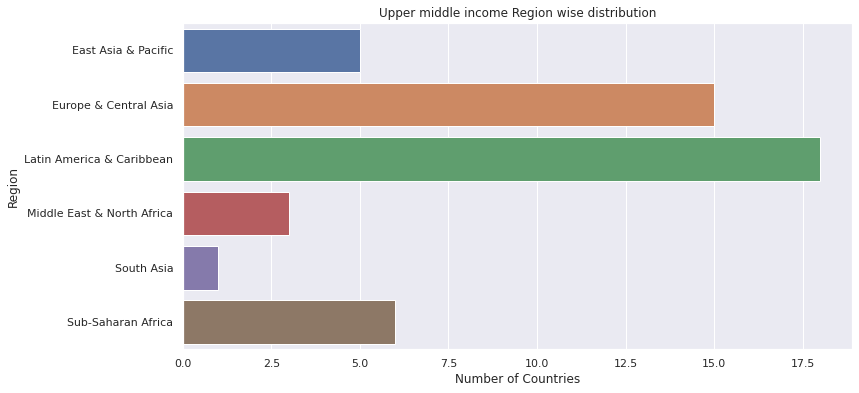

In [ ]:
income_wise_distribution("Upper middle income")

#Question: Does Lithuania and Korean Republic show any show any sign of stationarity with no possible fluctuations?(4)

##### They show no sign of seasonality or periodicity and can therefore be said to be truly stationary. This means that the respective governments harldy did anything to help reduce the increasing suicidal cases.

In [ ]:
df5 = df_higher_income.T
df5.columns = df5.loc["Country Name"]
df5 = df5.drop("Country Name", axis=0)
df5

Country Name,United Arab Emirates,Antigua and Barbuda,Australia,Austria,Belgium,Bahrain,"Bahamas, The",Barbados,Brunei Darussalam,Canada,...,Romania,Saudi Arabia,Singapore,Slovak Republic,Slovenia,Sweden,Seychelles,Trinidad and Tobago,Uruguay,United States
2000,8.6,1.9,12.7,19.9,22.0,6.6,2.3,2.6,1.9,11.9,...,12.9,3.2,12.4,14.2,32.0,15.1,9.2,16.3,16.0,11.0
2001,8.6,1.9,12.2,18.6,22.3,8.8,2.5,1.6,1.3,12.2,...,12.3,3.3,11.3,13.9,30.9,16.0,9.2,16.3,14.5,11.4
2002,8.0,1.3,11.3,19.3,20.9,9.2,2.3,0.3,1.6,11.9,...,14.2,3.4,12.4,14.6,29.1,15.5,8.6,15.3,19.8,11.8
2003,7.5,1.3,10.5,18.2,21.5,10.2,2.4,1.2,1.6,12.4,...,13.5,3.5,12.1,15.0,29.7,14.4,9.0,13.4,15.6,11.7
2004,7.7,1.7,10.3,17.5,20.2,10.2,3.2,1.4,1.9,11.7,...,12.7,3.4,11.7,13.9,28.7,14.8,9.3,13.1,15.3,11.9
2005,7.9,1.3,11.2,17.2,20.7,10.3,3.0,2.9,2.2,12.2,...,12.3,3.7,11.2,13.7,26.8,15.7,8.4,12.7,14.8,11.9
2006,8.3,0.5,10.6,16.4,20.2,8.2,3.5,1.6,2.9,11.2,...,12.9,4.0,11.7,14.5,27.9,15.0,8.1,11.3,15.5,12.1
2007,8.3,0.4,10.9,16.0,18.7,9.6,3.2,1.5,2.6,11.5,...,11.6,4.3,10.7,14.0,22.9,14.5,7.6,11.2,17.4,12.4
2008,8.5,0.3,11.6,15.8,20.3,9.2,3.3,1.0,2.1,11.5,...,11.7,4.6,10.4,12.7,20.6,15.0,7.8,13.7,15.1,12.7
2009,8.5,0.0,11.2,16.0,20.6,8.6,3.3,1.5,1.8,12.0,...,12.2,5.0,10.5,13.1,22.5,15.7,7.5,11.2,15.0,12.8


In [ ]:
df5.columns

Index(['United Arab Emirates', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Belgium', 'Bahrain', 'Bahamas, The', 'Barbados', 'Brunei Darussalam',
       'Canada', 'Switzerland', 'Chile', 'Cyprus', 'Czech Republic', 'Germany',
       'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
       'Greece', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Korea, Rep.', 'Kuwait', 'Lithuania', 'Luxembourg', 'Latvia',
       'Malta', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Panama',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Seychelles',
       'Trinidad and Tobago', 'Uruguay', 'United States'],
      dtype='object', name='Country Name')

In [ ]:
X = df5[["Lithuania"]].iloc[:,0].values

In [ ]:
result = adfuller(X)
print(f'ADF Statistic:{result[0]}')
print(f'p-value:{result[1]}')

p_value = result[1]
if (p_value > 0.05):
    print("Time Series is NOT Stationary")
else:
    print("Time Series is Stationary")

ADF Statistic:1.873063881016357
p-value:0.9984834299698222
Time Series is NOT Stationary


In [ ]:
X = df5[["Korea, Rep."]].iloc[:,0].values

In [ ]:
result = adfuller(X)
print(f'ADF Statistic:{result[0]}')
print(f'p-value:{result[1]}')

p_value = result[1]
if (p_value > 0.05):
    print("Time Series is NOT Stationary")
else:
    print("Time Series is Stationary")

ADF Statistic:-2.0508167521713054
p-value:0.26474541674252783
Time Series is NOT Stationary


#Question: HOw does suicide rate change over years with respect to their geographical region?(3)

In [ ]:
df.head()

,Country Name,Country Code,IncomeGroup,Region,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,Low income,South Asia,4.9,5.0,5.0,5.0,5.0,5.0,...,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1,NaN
4,Angola,AGO,Lower middle income,Sub-Saharan Africa,8.7,8.6,8.6,8.8,8.6,8.1,...,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1,NaN
5,Albania,ALB,Upper middle income,Europe & Central Asia,4.9,4.5,4.6,4.8,4.8,7.5,...,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3,NaN
8,United Arab Emirates,ARE,High income,Middle East & North Africa,8.6,8.6,8.0,7.5,7.7,7.9,...,8.2,7.9,7.5,7.0,6.5,6.0,5.6,6.0,6.4,NaN
9,Argentina,ARG,Upper middle income,Latin America & Caribbean,9.1,10.3,10.2,9.7,8.7,8.6,...,8.5,9.1,8.6,9.3,8.3,8.3,8.9,9.2,8.4,NaN


In [ ]:
df.Region.unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

In [ ]:
region_wise_timeseries_data = df.groupby(["Region"])[years_to_be_studied].median()
region_wise_timeseries_data

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,11.30,10.65,10.55,10.10,9.85,9.30,9.05,9.20,9.50,9.55,9.55,9.60,9.35,9.25,9.05,8.55,8.80,8.70,8.95,8.90
Europe & Central Asia,14.95,15.15,14.75,14.40,14.10,13.55,14.50,13.60,13.15,13.10,13.20,12.75,12.85,12.40,13.15,12.85,12.45,12.10,11.55,11.65
Latin America & Caribbean,5.70,5.70,5.40,5.90,5.80,5.40,5.70,5.20,5.10,5.10,5.00,5.60,5.40,5.60,5.80,5.90,5.70,6.10,6.00,6.00
Middle East & North Africa,5.50,5.60,5.45,5.25,5.15,4.95,4.85,5.05,5.35,5.80,5.65,5.65,5.70,5.25,5.40,5.25,5.10,5.30,5.55,5.05
North America,11.45,11.80,11.85,12.05,11.80,12.05,11.65,11.95,12.10,12.40,12.60,12.35,12.65,12.80,13.35,13.70,13.50,14.45,13.85,13.95
South Asia,7.25,6.90,6.65,6.45,6.35,6.45,6.35,6.45,6.50,6.55,6.55,6.50,6.55,6.55,6.45,6.50,6.50,6.65,6.70,6.75
Sub-Saharan Africa,9.35,9.25,8.85,8.80,8.70,8.40,8.40,8.00,7.60,7.65,7.80,7.75,7.65,7.55,7.30,7.00,6.90,6.85,6.65,6.70


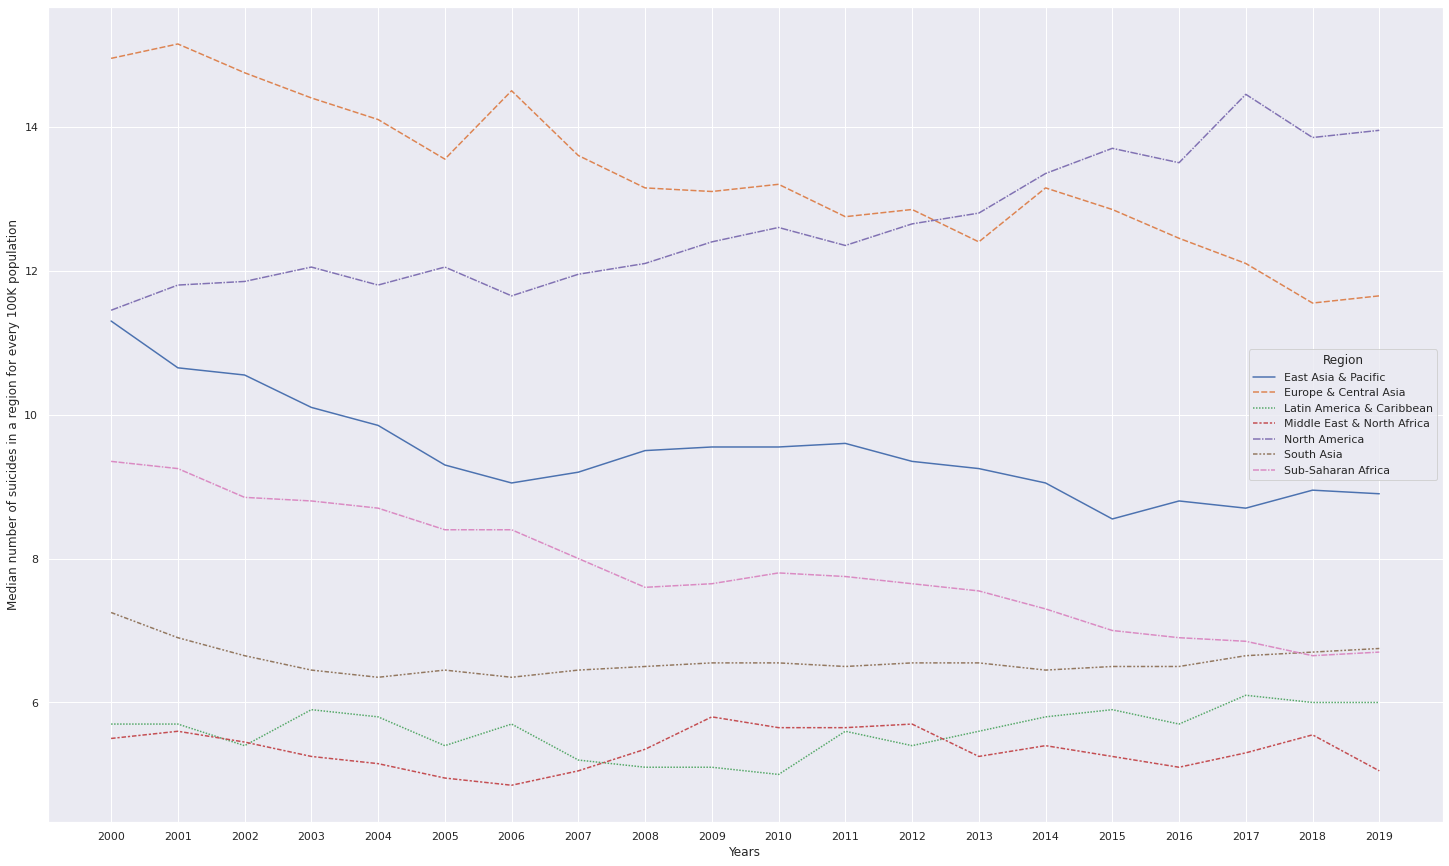

In [ ]:
plt.figure(figsize=(25,15))
plot = sns.lineplot(data = region_wise_timeseries_data.T)
plt.xlabel("Years")
plt.ylabel("Median number of suicides in a region for every 100K population")
plt.show()
plot.figure.savefig("output.png")